<a href="https://colab.research.google.com/github/AccountingInsights/AccountingInsights.github.io/blob/master/exel_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
filepath = "/content/drive/MyDrive/Colab Notebooks/"
filename ="SampleData_01.xlsx"
# filepathname = "/content/drive/MyDrive/Colab Notebooks/SampleData_01.xlsx"
filepathname = filepath + filename

df = pd.read_excel (filepathname)

df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,Region,Qty 1,Qty 2
5,NaN,A,80,90
6,NaN,B,85,87
7,NaN,C,75,58
8,NaN,D,65,124
9,NaN,E,110,156


In [6]:
name_of_sheet = "Sheet1"
row_of_header = 5
colums_to_drop = ["Unnamed: 0"]
index_column = "Region"

header_names = pd.read_excel(filepathname,
                             sheet_name=name_of_sheet,
                             header=row_of_header).columns

df = (
    pd
    .read_excel(filepathname,
                sheet_name=name_of_sheet,
                header=None,
                skiprows=row_of_header+1,
                names=header_names,
                na_values=['…', '...'])
    .drop(colums_to_drop,axis = 1)
    .set_index(index_column)
)


print(header_names)
df.head(10)

Index(['Unnamed: 0', 'Region', 'Qty 1', 'Qty 2'], dtype='object')


,Qty 1,Qty 2
Region,,
A,80,90
B,85,87
C,75,58
D,65,124
E,110,156
F,123,120
G,143,150


Text(0, 0.5, 'Cost per hour')

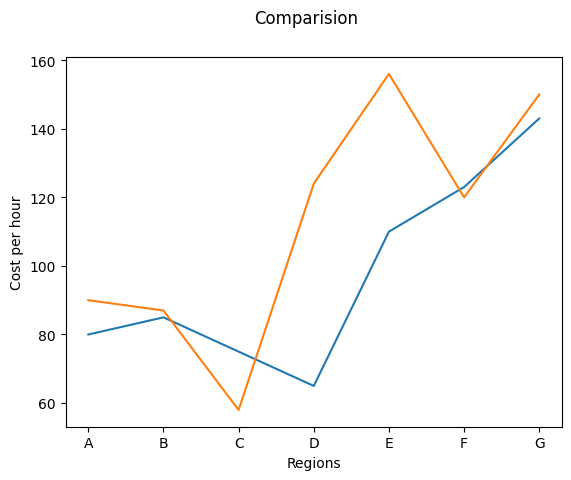

In [12]:
title_of_figure = "Comparision"
label_of_x = "Regions"
label_of_y = "Cost per hour"


fig, ax = plt.subplots()
sns.lineplot(x='Region', y='Qty 1', data=df,ax=ax)
sns.lineplot(x='Region', y='Qty 2', data=df,ax=ax)

  # Set title
fig.suptitle(title_of_figure)

    # Set axes labels
ax.set_xlabel(label_of_x)
ax.set_ylabel(label_of_y)



# fig = plt.subplots(figsize=(20, 5))
# sns.lineplot(x='Date', y='Euro rate', data=usd).set(title='Euro-USD rate', xlabel='Date', ylabel='Rate')

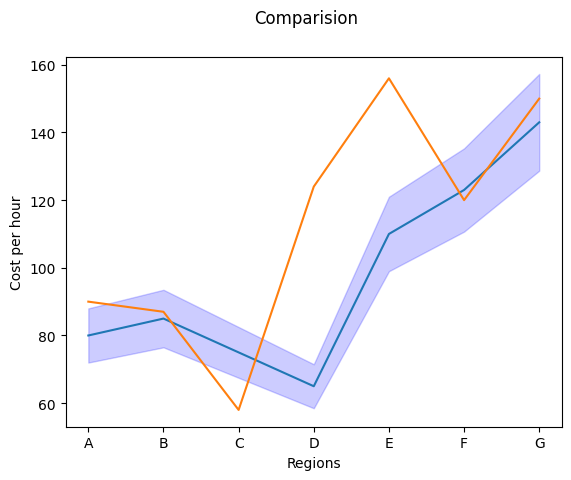

In [19]:
df['upper'] = df['Qty 1'] + (df['Qty 1'] *.1)
df['lower'] = df['Qty 1'] - (df['Qty 1'] *.1)


title_of_figure = "Comparision"
label_of_x = "Regions"
label_of_y = "Cost per hour"


fig, ax = plt.subplots()
sns.lineplot(x='Region', y='Qty 1', data=df,ax=ax)
sns.lineplot(x='Region', y='Qty 2', data=df,ax=ax)

# Set title
fig.suptitle(title_of_figure)

# Set axes labels
ax.set_xlabel(label_of_x)
ax.set_ylabel(label_of_y)

# Error Bars

ax.fill_between(df.index, df['lower'], df['upper'] , color='b', alpha=0.2)

In [18]:
df.head(10)

,Qty 1,Qty 2,upper,lower
Region,,,,
A,80,90,0.80,-0.80
B,85,87,0.85,-0.85
C,75,58,0.75,-0.75
D,65,124,0.65,-0.65
E,110,156,1.10,-1.10
F,123,120,1.23,-1.23
G,143,150,1.43,-1.43
